In [ ]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
NUM_Classes = 10
NUM_FEATURES = 2
NUM_SAMPLES = int(10**4)


X,Y = make_blobs(NUM_SAMPLES,
                   n_features=NUM_FEATURES,
                   centers=NUM_Classes,
                 cluster_std = 2,
                 center_box=[-60,60])

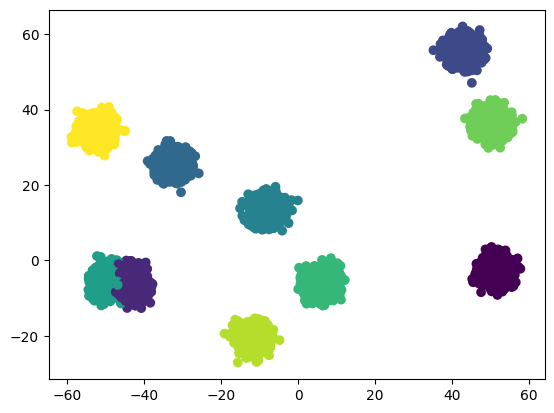

In [ ]:
plt.scatter(X[:,0],X[:,1],c = Y)

In [ ]:
X_tensor = torch.from_numpy(X).type(torch.float)
Y_tensor = torch.from_numpy(Y).type(torch.LongTensor)

x_train,x_test,y_train,y_test = train_test_split(X_tensor,Y_tensor,test_size=0.2)

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(NUM_FEATURES,NUM_FEATURES*5),
    nn.ReLU(),
    nn.Linear(NUM_FEATURES*5,NUM_Classes)
).to(device)

In [ ]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters()
                            ,lr = 0.01)


In [ ]:
with torch.inference_mode():
    print(torch.softmax(model_0(x_test.to(device)),dim=1).argmax(dim=1))

tensor([5, 6, 6,  ..., 5, 6, 6], device='cuda:0')


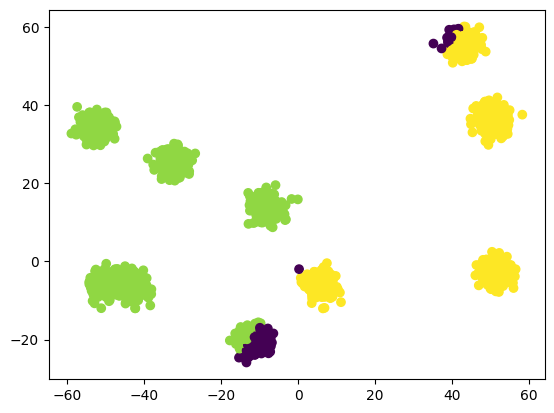

In [ ]:

plt.scatter(x_test.to('cpu')[:,0],x_test.to('cpu')[:,1],c = torch.softmax(model_0(x_test.to(device)),dim=1).argmax(dim=1).to('cpu'))

In [ ]:
def accuracy(y_pred,y_real):
    ratio_acc = torch.eq(y_pred,y_real).sum().item()
    return np.round(100*ratio_acc/y_real.size()[0],1)

In [ ]:
epochs = 10001

x_train,y_train = x_train.to(device),y_train.to(device)
x_test,y_test = x_test.to(device),y_test.to(device)

loss_train_array = []
loss_test_array = []
acc_train_array = []
acc_test_array = []

for i in range(epochs):
    model_0.train()

    y_train_logits = model_0(x_train)
    y_train_probability = torch.softmax(y_train_logits,dim=1)

    loss_train = loss_func(y_train_logits,y_train)
    loss_train_array.append(loss_train.tolist())
    accuracy_train = accuracy(y_train_probability.argmax(dim=1),y_train)
    acc_train_array.append(accuracy_train)

    optimizer.zero_grad()

    loss_train.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        y_test_logits = model_0(x_test)
        y_test_probability = torch.softmax(y_test_logits,dim=1)

        loss_test_array.append(loss_func(y_test_logits,y_test).tolist())
        acc_test_array.append(accuracy(y_test_probability.argmax(dim=1),y_test))

    if i%1000==0:
        print(f'Epoch : {i}| train_loss: {loss_train_array[-1]:.5f}| train_acc: {acc_train_array[-1]:.2f}% | test_loss: {loss_test_array[-1]:.5f}| test_acc: {acc_test_array[-1]:.2f}%')

Epoch : 0| train_loss: 12.67495| train_acc: 19.90% | test_loss: 6.49692| test_acc: 9.20%
Epoch : 1000| train_loss: 0.24195| train_acc: 88.30% | test_loss: 0.21994| test_acc: 89.60%
Epoch : 2000| train_loss: 0.21324| train_acc: 89.50% | test_loss: 0.19297| test_acc: 90.90%
Epoch : 3000| train_loss: 0.20247| train_acc: 89.90% | test_loss: 0.18375| test_acc: 91.60%
Epoch : 4000| train_loss: 0.19557| train_acc: 90.10% | test_loss: 0.17807| test_acc: 91.80%
Epoch : 5000| train_loss: 0.19042| train_acc: 90.40% | test_loss: 0.17369| test_acc: 92.20%
Epoch : 6000| train_loss: 0.18601| train_acc: 90.70% | test_loss: 0.16983| test_acc: 92.20%
Epoch : 7000| train_loss: 0.18220| train_acc: 90.90% | test_loss: 0.16639| test_acc: 92.40%
Epoch : 8000| train_loss: 0.17910| train_acc: 91.10% | test_loss: 0.16359| test_acc: 92.60%
Epoch : 9000| train_loss: 0.17627| train_acc: 91.30% | test_loss: 0.16129| test_acc: 92.70%
Epoch : 10000| train_loss: 0.17342| train_acc: 91.50% | test_loss: 0.15912| test_ac

**Surprisingly very good. I wonder what happens if we add more nodes**

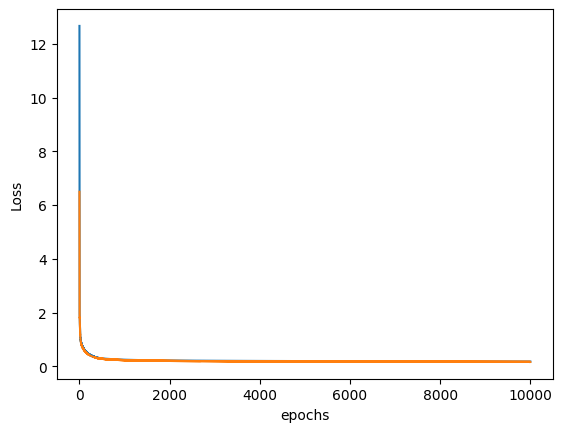

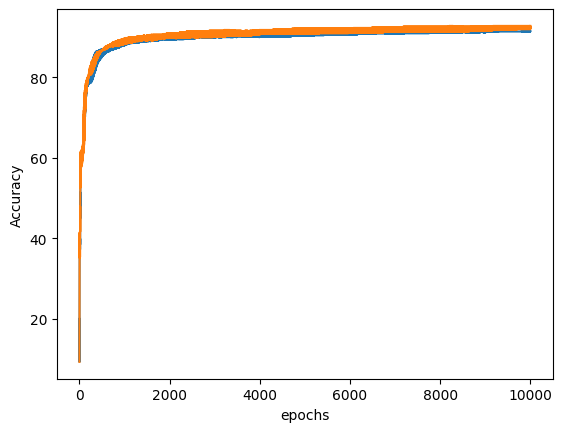

In [ ]:
plt.plot(loss_train_array)
plt.plot(loss_test_array)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(acc_train_array)
plt.plot(acc_test_array)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
model_1 = nn.Sequential(
    nn.Linear(NUM_FEATURES,NUM_FEATURES*10),
    nn.ReLU(),
    nn.Linear(NUM_FEATURES*10,NUM_Classes)
).to(device)

In [ ]:
optimizer = torch.optim.SGD(model_1.parameters()
                            ,lr = 0.01)


In [ ]:
with torch.inference_mode():
    print(torch.softmax(model_1(x_test.to(device)),dim=1).argmax(dim=1))

tensor([0, 9, 9,  ..., 0, 9, 3], device='cuda:0')


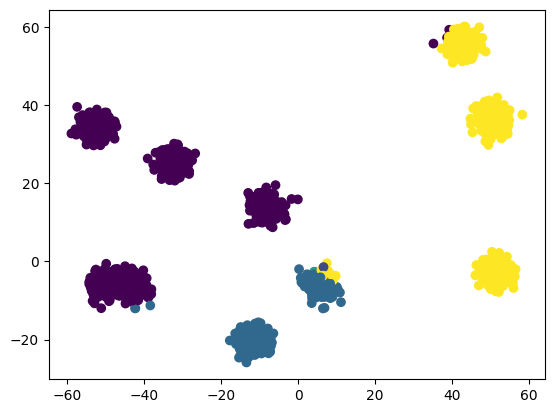

In [ ]:

plt.scatter(x_test.to('cpu')[:,0],x_test.to('cpu')[:,1],c = torch.softmax(model_1(x_test.to(device)),dim=1).argmax(dim=1).to('cpu'))

In [ ]:
epochs = 10001

x_train,y_train = x_train.to(device),y_train.to(device)
x_test,y_test = x_test.to(device),y_test.to(device)

loss_train_array = []
loss_test_array = []
acc_train_array = []
acc_test_array = []

for i in range(epochs):
    model_1.train()

    y_train_logits = model_1(x_train)
    y_train_probability = torch.softmax(y_train_logits,dim=1)

    loss_train = loss_func(y_train_logits,y_train)
    loss_train_array.append(loss_train.tolist())
    accuracy_train = accuracy(y_train_probability.argmax(dim=1),y_train)
    acc_train_array.append(accuracy_train)

    optimizer.zero_grad()

    loss_train.backward()

    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        y_test_logits = model_1(x_test)
        y_test_probability = torch.softmax(y_test_logits,dim=1)

        loss_test_array.append(loss_func(y_test_logits,y_test).tolist())
        acc_test_array.append(accuracy(y_test_probability.argmax(dim=1),y_test))

    if i%1000==0:
        print(f'Epoch : {i}| train_loss: {loss_train_array[-1]:.5f}| train_acc: {acc_train_array[-1]:.2f}% | test_loss: {loss_test_array[-1]:.5f}| test_acc: {acc_test_array[-1]:.2f}%')

Epoch : 0| train_loss: 14.27640| train_acc: 0.00% | test_loss: 6.85584| test_acc: 10.20%
Epoch : 1000| train_loss: 0.23376| train_acc: 88.30% | test_loss: 0.22257| test_acc: 88.60%
Epoch : 2000| train_loss: 0.21189| train_acc: 89.20% | test_loss: 0.20008| test_acc: 89.70%
Epoch : 3000| train_loss: 0.20123| train_acc: 89.70% | test_loss: 0.18954| test_acc: 90.30%
Epoch : 4000| train_loss: 0.19500| train_acc: 89.90% | test_loss: 0.18373| test_acc: 90.70%
Epoch : 5000| train_loss: 0.19052| train_acc: 90.10% | test_loss: 0.17932| test_acc: 91.10%
Epoch : 6000| train_loss: 0.18656| train_acc: 90.30% | test_loss: 0.17526| test_acc: 91.20%
Epoch : 7000| train_loss: 0.18276| train_acc: 90.40% | test_loss: 0.17132| test_acc: 91.80%
Epoch : 8000| train_loss: 0.17911| train_acc: 90.60% | test_loss: 0.16751| test_acc: 91.80%
Epoch : 9000| train_loss: 0.17542| train_acc: 90.80% | test_loss: 0.16364| test_acc: 92.00%
Epoch : 10000| train_loss: 0.17192| train_acc: 90.90% | test_loss: 0.16008| test_ac

**No tangible difference. Now lets check what happens if we do more layers**

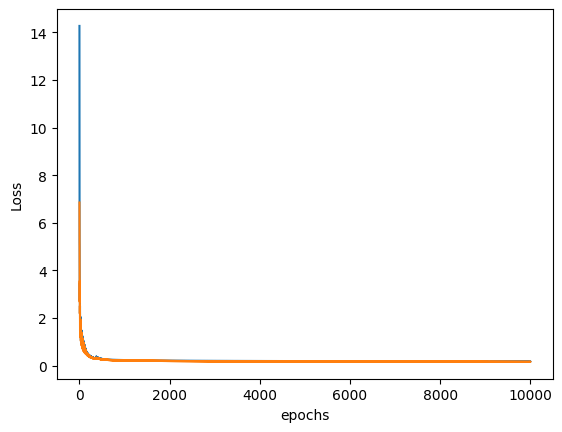

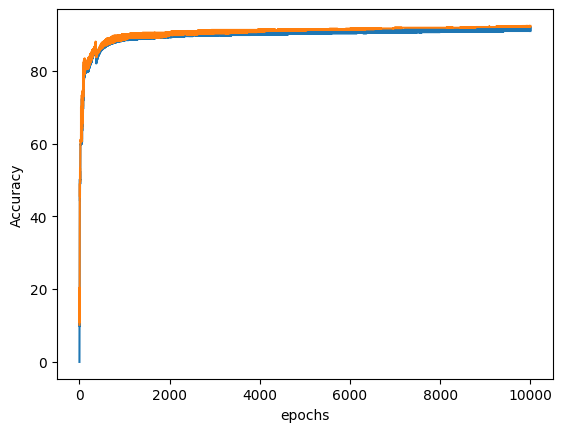

In [ ]:
plt.plot(loss_train_array)
plt.plot(loss_test_array)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(acc_train_array)
plt.plot(acc_test_array)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
N_multiplier = 5
model_2 = nn.Sequential(
    nn.Linear(NUM_FEATURES,NUM_FEATURES*N_multiplier),
    nn.ReLU(),
    nn.Linear(NUM_FEATURES*N_multiplier,NUM_FEATURES*N_multiplier),
    nn.ReLU(),
    nn.Linear(NUM_FEATURES*N_multiplier,NUM_Classes)
).to(device)

In [ ]:
optimizer = torch.optim.SGD(model_2.parameters()
                            ,lr = 0.01)


In [ ]:
with torch.inference_mode():
    print(torch.softmax(model_2(x_test.to(device)),dim=1).argmax(dim=1))

tensor([2, 9, 9,  ..., 5, 9, 4], device='cuda:0')


In [ ]:
epochs = 10001

x_train,y_train = x_train.to(device),y_train.to(device)
x_test,y_test = x_test.to(device),y_test.to(device)

loss_train_array = []
loss_test_array = []
acc_train_array = []
acc_test_array = []

for i in range(epochs):
    model_2.train()

    y_train_logits = model_2(x_train)
    y_train_probability = torch.softmax(y_train_logits,dim=1)

    loss_train = loss_func(y_train_logits,y_train)
    loss_train_array.append(loss_train.tolist())
    accuracy_train = accuracy(y_train_probability.argmax(dim=1),y_train)
    acc_train_array.append(accuracy_train)

    optimizer.zero_grad()

    loss_train.backward()

    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        y_test_logits = model_2(x_test)
        y_test_probability = torch.softmax(y_test_logits,dim=1)

        loss_test_array.append(loss_func(y_test_logits,y_test).tolist())
        acc_test_array.append(accuracy(y_test_probability.argmax(dim=1),y_test))

    if i%1000==0:
        print(f'Epoch : {i}| train_loss: {loss_train_array[-1]:.5f}| train_acc: {acc_train_array[-1]:.2f}% | test_loss: {loss_test_array[-1]:.5f}| test_acc: {acc_test_array[-1]:.2f}%')

Epoch : 0| train_loss: 3.47776| train_acc: 0.60% | test_loss: 3.04676| test_acc: 0.60%
Epoch : 1000| train_loss: 0.23882| train_acc: 88.10% | test_loss: 0.21633| test_acc: 90.00%
Epoch : 2000| train_loss: 0.20834| train_acc: 89.50% | test_loss: 0.18841| test_acc: 90.70%
Epoch : 3000| train_loss: 0.19794| train_acc: 90.00% | test_loss: 0.17962| test_acc: 91.60%
Epoch : 4000| train_loss: 0.19188| train_acc: 90.20% | test_loss: 0.17475| test_acc: 91.60%
Epoch : 5000| train_loss: 0.18703| train_acc: 90.30% | test_loss: 0.17122| test_acc: 92.00%
Epoch : 6000| train_loss: 0.18302| train_acc: 90.30% | test_loss: 0.16843| test_acc: 92.20%
Epoch : 7000| train_loss: 0.17942| train_acc: 90.60% | test_loss: 0.16536| test_acc: 92.10%
Epoch : 8000| train_loss: 0.17568| train_acc: 90.90% | test_loss: 0.16234| test_acc: 92.40%
Epoch : 9000| train_loss: 0.17151| train_acc: 91.60% | test_loss: 0.15884| test_acc: 92.90%
Epoch : 10000| train_loss: 0.17381| train_acc: 90.70% | test_loss: 0.16098| test_acc:

**Again no tangible difference**

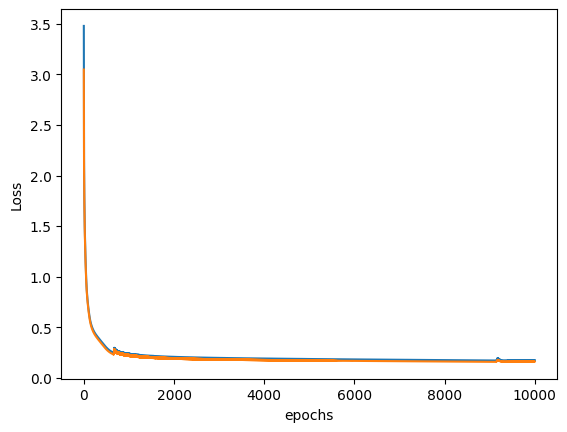

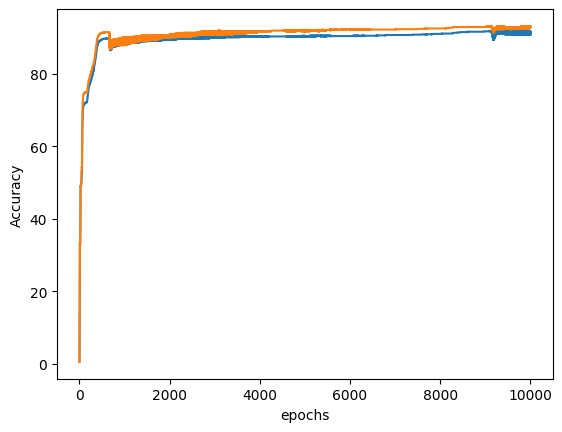

In [ ]:
plt.plot(loss_train_array)
plt.plot(loss_test_array)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(acc_train_array)
plt.plot(acc_test_array)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()